In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [43]:
#fileName = 'WhatsAppSaddaAdda.csv'
#fileName = 'WingB5xxChat.csv'

In [45]:
chatdf = pd.read_csv(fileName, parse_dates=['time'])

In [46]:
chatdf = chatdf[~chatdf['text'].str.contains('<Media omitted>')]

In [47]:
chatdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3884
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    3662 non-null   datetime64[ns]
 1   user    3662 non-null   object        
 2   text    3662 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 114.4+ KB


In [48]:
chatdf['time'] = pd.to_datetime(chatdf['time'])

In [49]:
chatdf = chatdf.set_index(pd.DatetimeIndex(chatdf['time'].values))

In [50]:
chatdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3662 entries, 2018-06-09 00:23:00 to 2020-07-29 21:53:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    3662 non-null   datetime64[ns]
 1   user    3662 non-null   object        
 2   text    3662 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 114.4+ KB


In [51]:
chatdf.describe()

/Users/ranjeetkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,time,user,text
count,3662,3662,3662
unique,2427,14,3186
top,2020-06-14 13:20:00,D K,😂
freq,10,579,73
first,2018-03-10 07:22:00,NaN,NaN
last,2020-12-06 15:36:00,NaN,NaN


## Q1. Most Active Members

<AxesSubplot:>

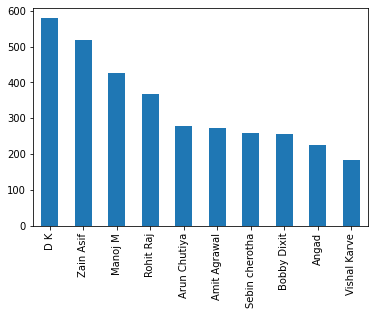

In [52]:
chatdf.user.value_counts().iloc[:10].plot(kind='bar')

## Most Active Month ( Top 5)

In [53]:
chatdf.head()

,time,user,text
2018-06-09 00:23:00,2018-06-09 00:23:00,Manoj M,https
2018-06-09 00:24:00,2018-06-09 00:24:00,Manoj M,Like a boss 😅
2018-06-09 00:24:00,2018-06-09 00:24:00,D K,Lolz
2018-09-13 00:10:00,2018-09-13 00:10:00,Zain Asif,🤩😍🤩😍
2018-09-13 05:23:00,2018-09-13 05:23:00,Ajay sathya,Unfortunately fake news


In [54]:
MonthCount = chatdf.resample("M").count()
MonthCount.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2018-03-31 to 2020-12-31
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   time    34 non-null     int64
 1   user    34 non-null     int64
 2   text    34 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [55]:
MonthCount.head()

,time,user,text
2018-03-31,24,24,24
2018-04-30,1,1,1
2018-05-31,17,17,17
2018-06-30,41,41,41
2018-07-31,34,34,34


In [56]:
#Dropping Extra Columns

MonthCount.drop('time', axis=1, inplace=True)
MonthCount.drop('user', axis=1, inplace=True)

MonthCount.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2018-03-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   text    34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


## Here lies the Issue. 

Text(0, 0.5, 'Texts per Day')

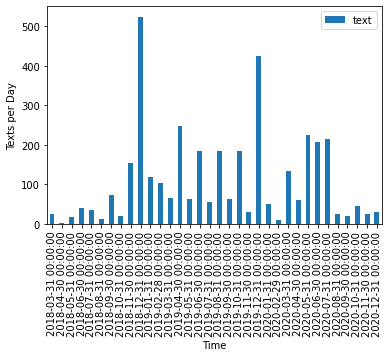

In [57]:
# I am trying to get a  bar plot, with better xticks. 
# Something similar to when we have default graph or if possible the xticks should have %m-%y 


monthlyPlot = MonthCount.plot(kind='bar')
monthlyPlot.set_xlabel('Time')
monthlyPlot.set_ylabel('Texts per Day')


#ax = df.plot()
# set monthly locator
#monthlyPlot.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# set formatter
#monthlyPlot.xaxis.set_major_formatter(mdates.DateFormatter('%mm-%YY'))
# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.show()

In [58]:
MonthCount.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2018-03-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   text    34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


In [59]:
MonthCount.to_csv("MonthlyCount.csv")

In [60]:
# Making a Method called generate Activity graph, which takes a DF as Input
# df should have DatetimeIndex

def getActivityGraphMonthly(df):
    MonthCount = df.resample("M").count()
    MonthCount.drop('time', axis=1, inplace=True)
    MonthCount.drop('user', axis=1, inplace=True)
    
    monthlyPlot = MonthCount.plot()
    monthlyPlot.set_xlabel('Time')
    monthlyPlot.set_ylabel('Texts per Month')

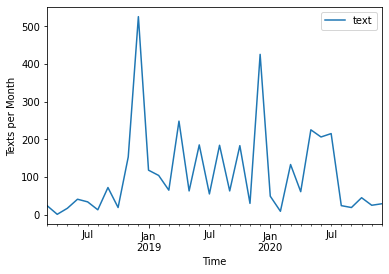

In [61]:
# Testing my Method

getActivityGraphMonthly(chatdf)

## Q3. Activity graph Per User with Time (Month)

In [62]:
# Using same method with a tweek in the Graph for User Name

def getUserMonthlyActivity(df, userName):
    MonthCount = df.resample("M").count()
    MonthCount.drop('time', axis=1, inplace=True)
    MonthCount.drop('user', axis=1, inplace=True)
    
    #print(MonthCount)
    monthlyPlot = MonthCount.plot(kind='bar')
    monthlyPlot.set_xlabel(userName)
    monthlyPlot.set_ylabel('Texts per Month')

IndexError: index 0 is out of bounds for axis 0 with size 0

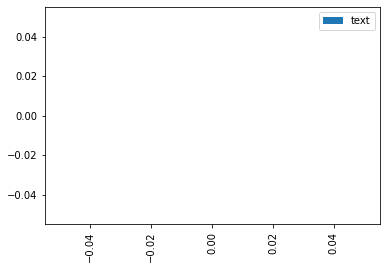

In [63]:
#testing user Method

name = 'Abhay Kumar'

userdf = chatdf[chatdf.user==name]

getUserMonthlyActivity(userdf, 'Abhay Kumar')

In [64]:
users = chatdf.user.unique()

In [65]:
users

array(['Manoj M', 'D K', 'Zain Asif', 'Ajay sathya', 'Angad',
       '+1 (780) 2456786', 'Ranjeet Kumar', 'Vishal Karve',
       'Arun Chutiya', 'Amit Agrawal', 'Rohit Raj', 'Bobby Dixit',
       'Suryakant Sharma', 'Sebin cherotha'], dtype=object)

In [66]:
for user in users:
    userdf = chatdf[chatdf.user==user]
    #getUserMonthlyActivity(userdf, user)

## Getting User Data

In [26]:
name = 'Abhay Kumar'

In [27]:
userdf.head()

,time,user,text
2020-04-07 17:21:00,2020-04-07 17:21:00,+91 8340 188 035,गया। में 34 कोरोना के मामले आने के बाद हड़कंप...
2020-07-19 18:17:00,2020-07-19 18:17:00,+91 8340 188 035,https


In [28]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2020-04-07 17:21:00 to 2020-07-19 18:17:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2 non-null      datetime64[ns]
 1   user    2 non-null      object        
 2   text    2 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 64.0+ bytes


In [29]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2020-04-07 17:21:00 to 2020-07-19 18:17:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2 non-null      datetime64[ns]
 1   user    2 non-null      object        
 2   text    2 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 64.0+ bytes


In [30]:
#Alltext

## Q4 Top 10 words

In [67]:
from collections import Counter

In [68]:
Alltext = ' '.join([x.lower() for x in chatdf['text']])

In [69]:
split_it = Alltext.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 


In [70]:
most_occur = Counter.most_common(40)

In [71]:
', '.join(x[0] for x in most_occur)

'the, i, to, a, happy, and, in, you, is, birthday, for, of, it, 😂, that, this, be, was, on, have, ?, are, we, can, so, 😅, just, but, if, not, thanks, as, my, or, what, at, guys, https, with, he'

## Q4a. Top 10 Word Winners

## Q5. Slang Contest

## Q6. WordCloud Of Top 10 Members

In [36]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [ ]:
#newStopWords = ['the', 'i', 'to', 'a', happy, and, in, you, is, birthday, for, of, it, 😂, that, this, be, was, on, have, ?, are, we, can, so, 😅, just, but, if, not, thanks, as, my, or, what, at, guys, https, with, he]

In [77]:
#newStopWords = ['hai', 'h', 'me', 'to', 'k', 'ka', 'se', 'ho', 'rha', 'hi', 'ke', 'bhi', 'ko', 'nhi', 'be', 'ki', 'aa', 'ye', 'kar', 'ab', 'tu', 'aur', 'nahi', 'sab', 'kya']
newStopWords = ['https']
newStopWords = newStopWords + list(STOPWORDS)

In [78]:
def create_word_cloud(data, name):
    userdf = chatdf[chatdf.user==name]
    alltext = ' '.join([x.lower() for x in userdf['text']])
    alltext = alltext.replace('\n', ' ')
    #print(alltext)
    #maskArray = np.array(Image.open("cloud.png"))
    cloud = WordCloud(background_color= "white", max_words=200, stopwords= set(newStopWords), width = 800, height = 800,min_font_size = 10)
    cloud.generate(alltext)
    cloud.to_file("Output/"+fileName.replace('.csv','')+"/"+name+".png")

In [79]:
name = 'VIVEK RAJ'

In [80]:
create_word_cloud(chatdf, name)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [83]:
for user in users:
    print(user)
    create_word_cloud(chatdf, user)

Manoj M
D K
Zain Asif
Ajay sathya
Angad
+1 (780) 2456786
Ranjeet Kumar
Vishal Karve
Arun Chutiya
Amit Agrawal
Rohit Raj
Bobby Dixit
Suryakant Sharma
Sebin cherotha
